# Puliamo sti cazzo di dati definitivamente

Per prima cosa importiamo le posizioni x e y di questi dati

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from functools import partial

plt.style.use("seaborn-v0_8-darkgrid")

In [35]:
zero_spettrofotometro = pd.read_csv("Zero_Vetrini.csv")  # micrometers
zero_depositore = 1.6e-2  # meter
posizione_vetrini = pd.read_csv("Posizioni_Vetrini_profilometro.csv")  # micrometers

In [36]:
zero_spettrofotometro


,dir,x_pos,y_pos
0,/data/21_04_I,-7530,41000
1,/data/02_05_II,8500,63000
2,/data/02_05_III,12700,57150
3,/data/28_04_IV,-2333,46831


In [37]:
posizione_vetrini

,file,x_pos,y_pos
0,/data/21_04_I/M1,-7322,34334
1,/data/21_04_I/M2,-7090,27553
2,/data/21_04_I/M3,-6866,20749
3,/data/21_04_I/M4,-6634,14400
4,/data/21_04_I/M5,-6380,7882
5,/data/21_04_I/M6,-6112,1142
6,/data/21_04_I/M7,-5576,-5309
7,/data/21_04_I/M8,-4836,-12138
8,/data/28_04_IV/M1,-3973,36559
9,/data/28_04_IV/M2,-3970,26453


è necessario calcolare la distanza di queste misure rispetto allo zero del vetrino... possiamo usare la metrica euclidea

In [38]:
def distance(x_1, y_1, x_2, y_2):
    return np.sqrt((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2)

Ora passiamo intelligentemente i parametri a distance... Dobbiamo metterli in un file finale ricordiamo a cui poi aggiungeremo i parametri delle due gaussiane in un modo furbo.

In [39]:
vetrino_1_name = posizione_vetrini.iloc[0:8]["file"]
vetrino_1 = distance(
    posizione_vetrini.iloc[0:8][" x_pos"],
    posizione_vetrini.iloc[0:8][" y_pos"],
    zero_spettrofotometro["x_pos"].loc[0],
    zero_spettrofotometro["y_pos"].loc[0],
)
vetrino_1 = pd.concat([vetrino_1_name, vetrino_1], axis=1)


In [40]:
vetrino_2_name = posizione_vetrini.iloc[8:12]["file"]
vetrino_2 = distance(
    posizione_vetrini.iloc[8:12][" x_pos"],
    posizione_vetrini.iloc[8:12][" y_pos"],
    zero_spettrofotometro["x_pos"].loc[3],
    zero_spettrofotometro["y_pos"].loc[3],
)
vetrino_2 = pd.concat([vetrino_2_name, vetrino_2], axis=1)
vetrino_2


,file,0
8,/data/28_04_IV/M1,10402.095174
9,/data/28_04_IV/M2,20443.645785
10,/data/28_04_IV/M3,42441.261068
11,/data/28_04_IV/M4,63363.518210


In [41]:
vetrino_3_name = posizione_vetrini.iloc[12:16]["file"]

vetrino_3 = distance(
    posizione_vetrini.iloc[12:16][" x_pos"],
    posizione_vetrini.iloc[12:16][" y_pos"],
    zero_spettrofotometro["x_pos"].loc[1],
    zero_spettrofotometro["y_pos"].loc[1],
)

vetrino_3 = pd.concat([vetrino_3_name, vetrino_3], axis=1)

vetrino_3


,file,0
12,/data/02_05_II/M1,3460.801352
13,/data/02_05_II/M2,12834.728669
14,/data/02_05_II/M3,67085.242028
15,/data/02_05_II/M4,64136.195904


In [42]:
vetrino_4_name = posizione_vetrini.iloc[16:20]["file"]

vetrino_4 = distance(
    posizione_vetrini.iloc[16:20][" x_pos"],
    posizione_vetrini.iloc[16:20][" y_pos"],
    zero_spettrofotometro["x_pos"].loc[2],
    zero_spettrofotometro["y_pos"].loc[2],
)
vetrino_4 = pd.concat([vetrino_4_name, vetrino_4], axis=1)

vetrino_4


,file,0
16,/data/02_05_III/M1,71038.508353
17,/data/02_05_III/M2,19735.356951
18,/data/02_05_III/M3,69334.234113
19,/data/02_05_III/M4,21510.321174


Ora che ho calcolato tutte le distanze, le converto da micrometri, in metri, perché SI

In [43]:
vetrino_1[0] *= 1e-6
vetrino_2[0] *= 1e-6
vetrino_3[0] *= 1e-6
vetrino_4[0] *= 1e-6

vetrino_1

,file,0
0,/data/21_04_I/M1,0.006669
1,/data/21_04_I/M2,0.013454
2,/data/21_04_I/M3,0.020262
3,/data/21_04_I/M4,0.026615
4,/data/21_04_I/M5,0.033138
5,/data/21_04_I/M6,0.039883
6,/data/21_04_I/M7,0.046350
7,/data/21_04_I/M8,0.053206


Aggiungo alle posizioni lo zero del depositore, in questo modo posso usare queste grandezze per il plot

In [44]:
vetrino_1[0] += zero_depositore
vetrino_2[0] += zero_depositore
vetrino_3[0] += zero_depositore
vetrino_4[0] += zero_depositore

In [45]:
vetrino_1


,file,0
0,/data/21_04_I/M1,0.022669
1,/data/21_04_I/M2,0.029454
2,/data/21_04_I/M3,0.036262
3,/data/21_04_I/M4,0.042615
4,/data/21_04_I/M5,0.049138
5,/data/21_04_I/M6,0.055883
6,/data/21_04_I/M7,0.062350
7,/data/21_04_I/M8,0.069206


In [46]:
vetrino_2


,file,0
8,/data/28_04_IV/M1,0.026402
9,/data/28_04_IV/M2,0.036444
10,/data/28_04_IV/M3,0.058441
11,/data/28_04_IV/M4,0.079364


In [47]:
vetrino_3


,file,0
12,/data/02_05_II/M1,0.019461
13,/data/02_05_II/M2,0.028835
14,/data/02_05_II/M3,0.083085
15,/data/02_05_II/M4,0.080136


In [48]:
vetrino_4


,file,0
16,/data/02_05_III/M1,0.087039
17,/data/02_05_III/M2,0.035735
18,/data/02_05_III/M3,0.085334
19,/data/02_05_III/M4,0.037510


In [49]:
def cosine_law(x_pos, prop_const, pow, distance=12e-2):
    theta = np.arctan2(x_pos, distance)
    return prop_const * np.cos(theta) ** pow / distance**2


In [50]:
positions = pd.concat([vetrino_1, vetrino_2, vetrino_3, vetrino_4], axis=0).rename(
    columns={0: "pos"}
)
positions

,file,pos
0,/data/21_04_I/M1,0.022669
1,/data/21_04_I/M2,0.029454
2,/data/21_04_I/M3,0.036262
3,/data/21_04_I/M4,0.042615
4,/data/21_04_I/M5,0.049138
5,/data/21_04_I/M6,0.055883
6,/data/21_04_I/M7,0.062350
7,/data/21_04_I/M8,0.069206
8,/data/28_04_IV/M1,0.026402
9,/data/28_04_IV/M2,0.036444


In [51]:
# positions.to_excel("position_adjusted.xlsx")


Adesso mi metto a fittare... E non mi dovete rompere i coglioni... Capito???

In [52]:
Data_Adj = pd.read_excel("Tabella_Coseno.xlsx")
Data_Adj


,File,Posizione[m],Altezza[nm],Errore[nm]
0,/data/21_04_I/M1,0.022669,98.3,15.092374
1,/data/21_04_I/M2,0.029454,94.5,4.025333
2,/data/21_04_I/M3,0.036262,88.7,4.793428
3,/data/21_04_I/M4,0.042615,78.7,5.562900
4,/data/21_04_I/M5,0.049138,67.4,6.190286
5,/data/21_04_I/M6,0.055883,55.2,25.911596
6,/data/21_04_I/M7,0.062350,61.7,5.292124
7,/data/21_04_I/M8,0.069206,64.2,11.349149
8,/data/02_05_II/M1,0.019461,87.0,14.131711
9,/data/02_05_II/M2,0.028835,77.8,16.635613


In [53]:
Vetr_1 = Data_Adj.iloc[0:8]
Vetr_1


,File,Posizione[m],Altezza[nm],Errore[nm]
0,/data/21_04_I/M1,0.022669,98.3,15.092374
1,/data/21_04_I/M2,0.029454,94.5,4.025333
2,/data/21_04_I/M3,0.036262,88.7,4.793428
3,/data/21_04_I/M4,0.042615,78.7,5.562900
4,/data/21_04_I/M5,0.049138,67.4,6.190286
5,/data/21_04_I/M6,0.055883,55.2,25.911596
6,/data/21_04_I/M7,0.062350,61.7,5.292124
7,/data/21_04_I/M8,0.069206,64.2,11.349149


In [54]:
cosine_law_fixed = partial(cosine_law, distance=12e-2)

popt, pcov = curve_fit(
    cosine_law_fixed,
    Vetr_1["Posizione[m]"],
    Vetr_1["Altezza[nm]"] * 1e-9,
    p0=(1.0, 4.0),
    sigma=Vetr_1["Errore[nm]"] * 1e-9,
)
perr = np.sqrt(np.diag(pcov))

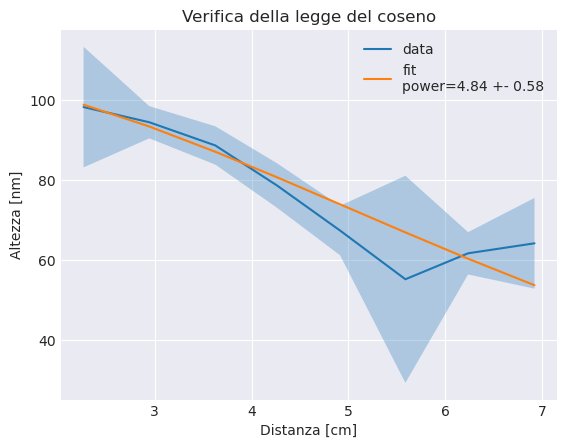

In [55]:
plt.plot(Vetr_1["Posizione[m]"] * 1e2, Vetr_1["Altezza[nm]"], label="data")
plt.plot(
    Vetr_1["Posizione[m]"] * 1e2,
    cosine_law(Vetr_1["Posizione[m]"], *popt) * 1e9,
    label=f"fit\npower={popt[1]:.2f} +- {perr[1]:.2f}",
)

plt.fill_between(
    Vetr_1["Posizione[m]"] * 1e2,
    Vetr_1["Altezza[nm]"] + Vetr_1["Errore[nm]"],
    Vetr_1["Altezza[nm]"] - Vetr_1["Errore[nm]"],
    alpha=0.3,
)
plt.xlabel("Distanza [cm]")
plt.ylabel("Altezza [nm]")
plt.title("Verifica della legge del coseno")
plt.legend()
# plt.savefig("Fit_Coseno.eps", format = "eps")
# plt.savefig("Fit_Coseno.svg", format = "svg")

Text(0, 0.5, 'Altezza [nm]')

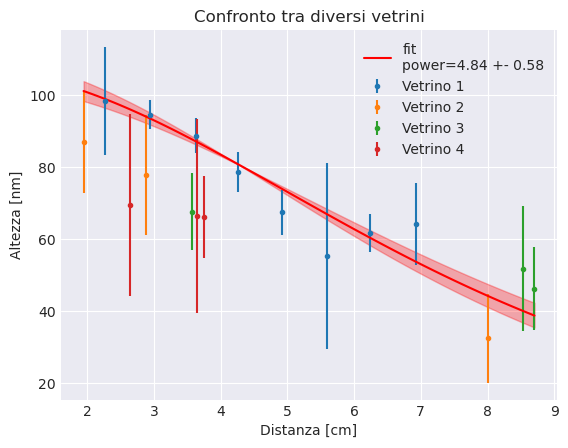

In [56]:
plt.errorbar(
    Data_Adj["Posizione[m]"].iloc[0:8] * 1e2,
    Data_Adj["Altezza[nm]"].iloc[0:8],
    yerr=Data_Adj["Errore[nm]"].iloc[0:8],
    fmt=".",
    label="Vetrino 1",
)
plt.errorbar(
    Data_Adj["Posizione[m]"].iloc[8:11] * 1e2,
    Data_Adj["Altezza[nm]"].iloc[8:11],
    yerr=Data_Adj["Errore[nm]"].iloc[8:11],
    fmt=".",
    label="Vetrino 2",
)
plt.errorbar(
    Data_Adj["Posizione[m]"].iloc[11:14] * 1e2,
    Data_Adj["Altezza[nm]"].iloc[11:14],
    yerr=Data_Adj["Errore[nm]"].iloc[11:14],
    fmt=".",
    label="Vetrino 3",
)
plt.errorbar(
    Data_Adj["Posizione[m]"].iloc[14:17] * 1e2,
    Data_Adj["Altezza[nm]"].iloc[14:17],
    yerr=Data_Adj["Errore[nm]"].iloc[14:17],
    fmt=".",
    label="Vetrino 4",
)
x = np.linspace(Data_Adj["Posizione[m]"].min(), Data_Adj["Posizione[m]"].max(), num=100)

plt.plot(
    x * 1e2,
    cosine_law(x, *popt) * 1e9,
    label=f"fit\npower={popt[1]:.2f} +- {perr[1]:.2f}",
    c="r",
)
plt.fill_between(
    x * 1e2,
    cosine_law(x, *(popt + perr)) * 1e9,
    cosine_law(x, *(popt - perr)) * 1e9,
    color="r",
    alpha=0.3,
)

plt.legend()
plt.title("Confronto tra diversi vetrini")
plt.xlabel("Distanza [cm]")
plt.ylabel("Altezza [nm]")
# plt.savefig("Confronto_Coseno.eps", format = "eps")
# plt.savefig("Confronto_Coseno.svg", format = "svg")

# Immagini Spettrofotometro

In [57]:
data_spettro = pd.read_csv("Risultati_Transmittance_exact_spettrofotometro.csv")
data_spettro.head()


,NomeFile,ValoreFit,ErrFit,χ_2_Rid,GdL
0,data/21-04_spettrofotometro/ELAB/AU-Vetro-Vetr...,1.616328e-08,9.897854e-11,142.601027,900
1,data/21-04_spettrofotometro/ELAB/AU-PDMS-Vetro...,2.070416e-08,3.380997e-10,980.016205,900
2,data/21-04_spettrofotometro/ELAB/AU_vetro-Vetr...,8.660590e-08,1.811716e-10,0.252263,897
3,data/21-04_spettrofotometro/ELAB/AU-Vetro-Vetr...,3.050097e-09,1.398162e-10,799.790690,640
4,data/2-05_spettrofotometro/ELAB/Oro-Oro 1.csv,4.351801e-08,1.158558e-10,9.275973,900


In [58]:
data_spettro.loc[data_spettro.index[4:10], "position"] = (
    np.array([1.2, 3.6, 2.8, 1.7, 6.4, 5.9]) * -1e-2 + 8.6e-2
)
data_2_05 = data_spettro.iloc[4:10].sort_values(by="position")
# data_2_05["position"] = pd.Series([1.2e-2, 3.6e-2, 2.8e-2, 1.7e-2, 6.4e-2, 5.9e-2])
data_2_05

,NomeFile,ValoreFit,ErrFit,χ_2_Rid,GdL,position
8,data/2-05_spettrofotometro/ELAB/Oror-oro 6_1.csv,8.372748e-08,2.311770e-10,0.552770,900,0.022
9,data/2-05_spettrofotometro/ELAB/Oror-oro 5_1.csv,8.140044e-08,1.975361e-10,0.513227,899,0.027
5,data/2-05_spettrofotometro/ELAB/Oror-oro 4_1.csv,6.500473e-08,1.601473e-10,1.851937,900,0.050
6,data/2-05_spettrofotometro/ELAB/Oror-oro 3_1.csv,5.758482e-08,1.430671e-10,3.210193,900,0.058
7,data/2-05_spettrofotometro/ELAB/Oror-oro 2_1.csv,4.837033e-08,1.279814e-10,6.768962,900,0.069
4,data/2-05_spettrofotometro/ELAB/Oro-Oro 1.csv,4.351801e-08,1.158558e-10,9.275973,900,0.074


In [59]:
data_spettro.loc[data_spettro.index[17:25], "position"] = (
    np.array([2.2, 5.2, 0.9, 3.2, 1.7, 0.7, 4.4, 6.6]) * 1e-2 + 1.6e-2
)
data_spettro.loc[data_spettro.index[25:30], "position"] = (
    np.array([5.0, 2.0, 3.0, 1.0, 4.0]) * 1e-2 + 1.6e-2
)
data_5_05_vetr_III = data_spettro.iloc[17:20].sort_values(by="position")
data_5_05_vetr_III["position"] = (
    10.2e-2 - data_5_05_vetr_III["position"]
)  # è una serie presa con spessore invertito
data_5_05_vetr_II = (
    data_spettro.iloc[20:25].drop(22).sort_values(by="position")
)  # elimino le due righe che hanno un chi quadro assurdo
data_5_05_vetr_I = data_spettro.iloc[25:30].drop(28).sort_values(by="position")

In [60]:
data_5_05_vetr_I


,NomeFile,ValoreFit,ErrFit,χ_2_Rid,GdL,position
26,data/5-05_spettrofotometro/vetrino1_spettrofot...,7.356523e-08,1.553412e-10,0.714823,900,0.036
27,data/5-05_spettrofotometro/vetrino1_spettrofot...,6.094691e-08,1.489669e-10,2.448012,900,0.046
29,data/5-05_spettrofotometro/vetrino1_spettrofot...,5.031751e-08,1.159487e-10,4.524261,900,0.056
25,data/5-05_spettrofotometro/vetrino1_spettrofot...,3.810642e-08,1.039568e-10,13.323057,900,0.066


In [61]:
data_spettro.loc[data_spettro.index[30:34], "position"] = (
    np.array([6.0, 5.0, 3.0, 4.0]) * 1e-2 + 1.6e-2
)
data_9_05 = data_spettro.iloc[30:34].sort_values(by="position")
data_9_05

,NomeFile,ValoreFit,ErrFit,χ_2_Rid,GdL,position
32,data/9_05_spettrofotometro/ELAB/gold_glass_tra...,7.416668e-08,1.661333e-10,0.768101,900,0.046
33,data/9_05_spettrofotometro/ELAB/gold_glass_tra...,5.604184e-08,1.363875e-10,3.429599,900,0.056
31,data/9_05_spettrofotometro/ELAB/gold_glass_tra...,4.893307e-08,1.119627e-10,4.881715,900,0.066
30,data/9_05_spettrofotometro/ELAB/gold_glass_tra...,4.060212e-08,1.039520e-10,10.191972,900,0.076


In [62]:
data_spettro.loc[data_spettro.index[34:40], "position"] = (
    np.array([4.0, 1.0, 6.0, 7.0, 2.0, 5.0]) * 1e-2 + 1.6e-2
)
data_12_05 = data_spettro.iloc[34:40].sort_values(by="position")
data_12_05

,NomeFile,ValoreFit,ErrFit,χ_2_Rid,GdL,position
35,data/12-05_spettrofotometro/ELAB/AU-Vetro_1-cm...,8.428462e-08,2.104305e-10,0.432414,900,0.026
38,data/12-05_spettrofotometro/ELAB/AU-Vetro_2-cm...,7.343407e-08,2.082730e-10,1.302587,900,0.036
34,data/12-05_spettrofotometro/ELAB/AU-Vetro_4-cm...,3.425075e-08,1.826994e-10,62.471853,900,0.056
39,data/12-05_spettrofotometro/ELAB/AU-Vetro_5-cm...,5.045673e-08,1.836368e-10,11.183145,900,0.066
36,data/12-05_spettrofotometro/ELAB/AU-Vetro_6-cm...,5.147098e-08,1.852840e-10,10.231275,900,0.076
37,data/12-05_spettrofotometro/ELAB/AU-Vetro_7-cm...,4.495781e-08,2.044345e-10,24.785984,900,0.086


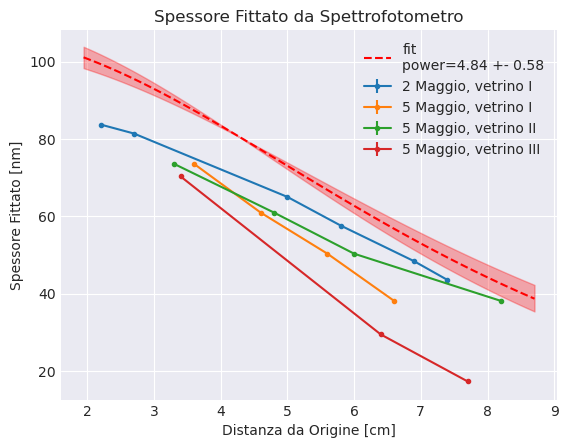

In [64]:
# plt.plot(data_12_05["position"] * 1e2, data_12_05["ValoreFit"] * 1e9, '.-', label = "12 Maggio, vetrino IV")
plt.errorbar(
    data_2_05["position"] * 1e2,
    data_2_05["ValoreFit"] * 1e9,
    yerr=data_2_05["ErrFit"] * 1e9,
    fmt=".-",
    label="2 Maggio, vetrino I",
)
# plt.errorbar(data_9_05["position"] * 1e2, data_9_05["ValoreFit"] * 1e9, '.-', label = '9 Maggio, vetrino ')
plt.errorbar(
    data_5_05_vetr_I["position"] * 1e2,
    data_5_05_vetr_I["ValoreFit"] * 1e9,
    yerr=data_5_05_vetr_I["ErrFit"] * 1e9,
    fmt=".-",
    label="5 Maggio, vetrino I",
)
plt.errorbar(
    data_5_05_vetr_II["position"] * 1e2,
    data_5_05_vetr_II["ValoreFit"] * 1e9,
    yerr=data_5_05_vetr_II["ErrFit"] * 1e9,
    fmt=".-",
    label="5 Maggio, vetrino II",
)
plt.errorbar(
    data_5_05_vetr_III["position"] * 1e2,
    data_5_05_vetr_III["ValoreFit"] * 1e9,
    yerr=data_5_05_vetr_III["ErrFit"] * 1e9,
    fmt=".-",
    label="5 Maggio, vetrino III",
)
plt.plot(
    x * 1e2,
    cosine_law(x, *popt) * 1e9,
    label=f"fit\npower={popt[1]:.2f} +- {perr[1]:.2f}",
    c="r",
    ls="--",
)
plt.fill_between(
    x * 1e2,
    cosine_law(x, *(popt + perr)) * 1e9,
    cosine_law(x, *(popt - perr)) * 1e9,
    color="r",
    alpha=0.3,
)

plt.legend()
plt.xlabel("Distanza da Origine [cm]")
plt.ylabel("Spessore Fittato [nm]")
plt.title("Spessore Fittato da Spettrofotometro")
# plt.savefig("Spessore_Spettrofotometro.svg", format="svg")